## Data Generator for Simple Dynamic Systems
This file is used to generate data via simulation of simple system dynamics.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import exp, ceil, pi
from sklearn import preprocessing
from scipy import sparse

### Sin Function

In [ ]:
def Sin_generate(n_step, omega = 1, theta0 = 0, stepsize = 1e-1):
    xs = np.arange(theta0, theta0 + n_step*stepsize, stepsize)
    return np.sin(xs)

In [ ]:
plt.figure(figsize=(15,5))
array = Sin_generate(10000)
plt.plot(array)

In [ ]:
np.save('../data/Sin_1_10000', array)

### Ornstein-Uhlenbeck process

In [ ]:
def OU_generate(n_step, y0 = 0, stepsize = 1e-1, tau = 1, epsilon = 2**0.5):
    getE = lambda y : y * exp(- 1 * stepsize / tau)
    getV = lambda y : epsilon**2 * tau / 2 * (1 - exp(- 2 * 1 * stepsize / tau))
    ys = [y0]
    for i in range(n_step - 1):
        E = getE(ys[-1])
        V = getV(ys[-1])
        ys.append(np.random.normal(E, V**0.5))
    return np.array(ys)

In [ ]:
array = OU_generate(100000, y0 = 1)
plt.plot(array)

In [ ]:
np.save('../data/OU_1_100000', array)

### Forced Van der Pol oscillator

In [ ]:
def VDP_generate(n_step, stepsize = 1e-1, y1 = 0, y2 = 0, alpha = 0.5, theta = 2, epsilon = 10)

## Data preprocess

### Transfer serie to train/valid/test dataset

In [ ]:
def SerieToPieces(data, piece_length = 50, valid_ratio = 0.1, test_ratio = 0.1, shuffle = True):
    length = len(data)
    n_pieces = length - piece_length
    pieces = np.array([data[i : i + piece_length + 1] for i in range(n_pieces)])
    n_train = int((1 - valid_ratio - test_ratio) * n_pieces)
    n_valid = int(valid_ratio * n_pieces)
    n_test = n_pieces - n_train - n_valid
    train = pieces[: n_train]
    valid = pieces[n_train : n_train+n_valid]
    if shuffle:
        np.random.shuffle(train)
        np.random.shuffle(valid)
    test  = pieces[n_train+n_valid :]
    return (train[:,:-1], train[:,-1], valid[:,:-1], valid[:,-1], test[:,:-1], test[:,-1])

### Transfer regression into classification

In [ ]:
def DatasetAbsoluteDiscretization(data, padding = '10%', num_class = 12, piece_length = 50, 
                                  valid_ratio = 0.1, test_ratio = 0.1, shuffle = True, sparse = False):
    ub = np.max(data)
    lb = np.min(data)
    # extend upperbound and lowerbound
    if type(padding) == str:
        pad_ratio = int(padding[:-1]) / 100
        ub += (ub - lb) * pad_ratio
        lb += -(ub - lb) * pad_ratio
    else:
        ub += padding
        lb += -padding
    # discretization
    interval_width = (ub - lb) / (num_class - 2)
    thresholds = np.arange(lb, lb + interval_width*(num_class-1), interval_width)
    find_class = lambda y:np.sum(thresholds < y)
    ohe = preprocessing.OneHotEncoder(sparse = sparse)
    ohe.fit_transform(np.array([np.arange(0, 12)]).T)
    to_digits = lambda y:ohe.transform(np.array([[find_class(y)]]))
    train_x, train_y, valid_x, valid_y, test_x, test_y = SerieToPieces(data, piece_length, valid_ratio,
                                                                      test_ratio, shuffle)
    transfered_ys = []
    for ys in [train_y, valid_y, test_y]:
        digits_list = []
        for y in ys:
            digits_list.append(to_digits(y))
        if digits_list == []:
            transfered_ys.append([])
        else:
            if sparse:
                transfered_ys.append(sparse.vstack(digits_list))
            else:
                transfered_ys.append(np.vstack(digits_list))
    return (train_x, train_y, valid_x, valid_y, test_x, test_y), transfered_ys[0], to_digits, thresholds

In [ ]:
(train_x, train_y, valid_x, valid_y, test_x, test_y), to_digits = DatasetAbsoluteDiscretization(array, piece_length = 50, valid_ratio = 0,
                                                                      test_ratio = 0.1, shuffle = True)

In [ ]:
ts = np.arange(0, 11, 1)

In [ ]:
np.sum(ts < 0)

In [ ]:
ohe = preprocessing.OneHotEncoder(n_values = 12)

In [ ]:
mat = ohe.fit_transform(np.array([np.arange(0, 12)]).T)

In [ ]:
np.array([np.arange(0, 12)]).T

In [ ]:
mat.data

In [ ]:
ohe.transform(np.array([[11],[8]]))[1,8]

### Lorenz attractor

In [2]:
def Lorenz_generate(n_step, x0 = 0, y0 = 1, z0 = 0, sigma = 10, beta = 3, rou = 28, timestep = 0.01):
    xs = np.zeros([1, n_step])
    ys = np.zeros([1, n_step])
    zs = np.zeros([1, n_step])
    x = x0
    y = y0
    z = z0
    for step in range(n_step):
        dx = sigma * (y - x)
        dy = x * (rou - z) - y
        dz = x * y - beta * z
        x += dx * timestep
        y += dy * timestep
        z += dz * timestep
        xs[0,step] = x
        ys[0,step] = y
        zs[0,step] = z
    return np.vstack([xs, ys, zs])

In [4]:
path1 = Lorenz_generate(10000, x0 = 0, y0 = 1, z0 = 0)
#path2 = Lorenz_generate(3000, x0 = 0.01, y0 = 1.01, z0 = 0.01)

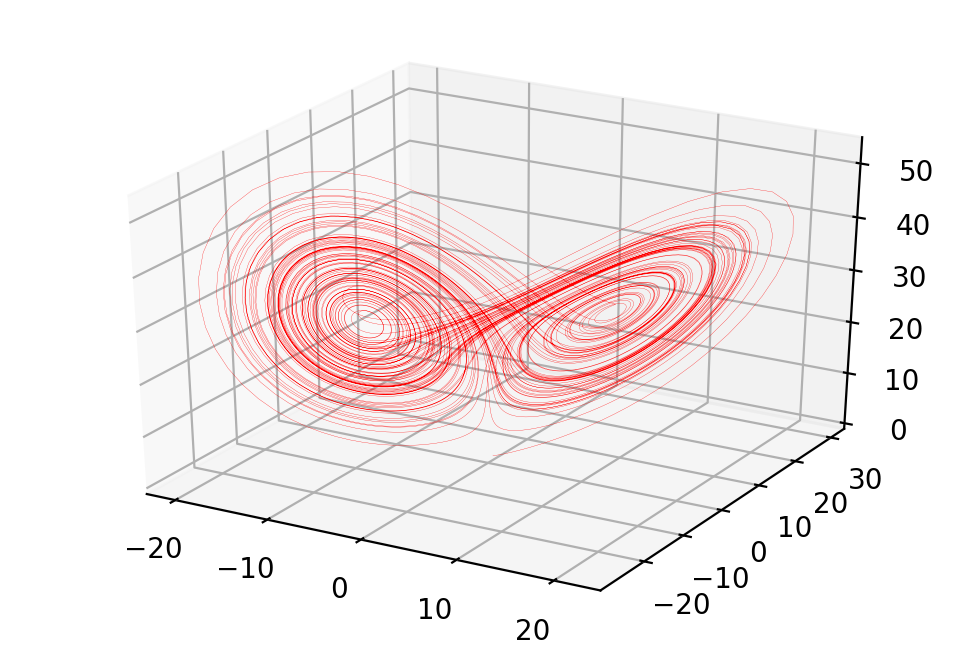

In [5]:
f = plt.figure(dpi = 200)
ax = f.add_subplot(111, projection = '3d')
ax.plot(xs = path1[0, :], ys = path1[1, :], zs = path1[2, :], c = 'r', marker = '', linewidth = 0.1)
#ax.plot(xs = path2[0, :], ys = path2[1, :], zs = path2[2, :], c = 'b', marker = '', linewidth = 0.3)

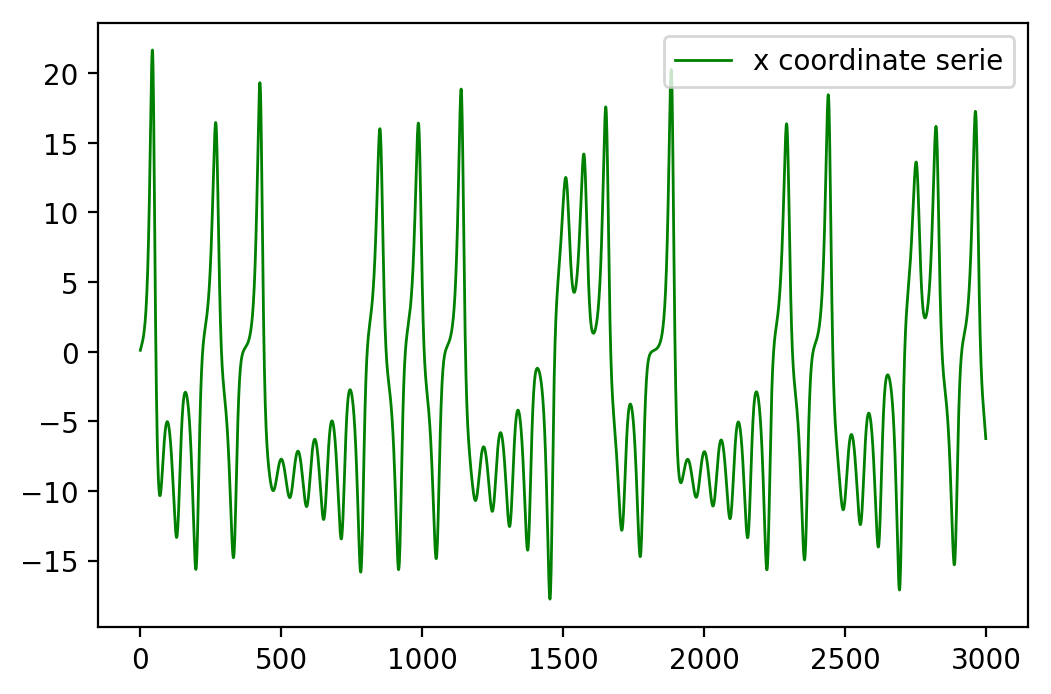

In [16]:
plt.figure(dpi = 200)
plt.plot(path1[0,:3000], linewidth = 1, c = 'g', label = 'x coordinate serie')
plt.legend()

In [86]:
np.save('../data/Lorenz_1_100000_x', path1[0, :])
np.save('../data/Lorenz_1_100000_y', path1[1, :])
np.save('../data/Lorenz_1_100000_z', path1[2, :])


(array([ 84., 222., 231., 119., 136.,  67.,  44.,  38.,  43.,  16.]),
 array([-15.83522987, -12.08517196,  -8.33511406,  -4.58505615,
         -0.83499825,   2.91505965,   6.66511756,  10.41517546,
         14.16523337,  17.91529127,  21.66534918]),
 <a list of 10 Patch objects>)

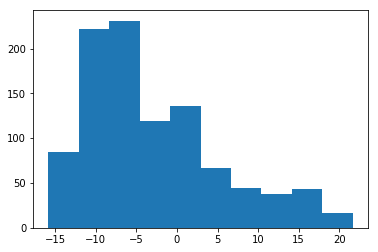

In [84]:
plt.hist(path1[0,:1000])

### Financial Data Generator

In [18]:
from price_util import *

In [41]:
data = GetStockPricesWithinDay(start_time = '20160502 00:00:00', end_time = '20160502 23:59:59', sample_moment = '5min', 
                               stock_name = 'BABA', as_dataframe = False)
data2 = GetStockPricesWithinDay(start_time = '20160502 00:00:00', end_time = '20160502 23:59:59', sample_moment = '5min', 
                               stock_name = 'BABA', as_dataframe = False)

progress 101 / 390.
progress 201 / 390.
progress 301 / 390.
progress 390 / 390.
progress 101 / 390.
progress 201 / 390.
progress 301 / 390.
progress 390 / 390.


In [49]:
data

,datetime,price
0,2924362950589574000,153.38
1,2924363066944186000,153.20
2,2924363162484762000,153.10
3,2924363282196064000,153.30
4,2924363402318032000,153.46
5,2924363525384956000,153.38
6,2924363640081848000,153.32
7,2924363760127328000,153.00
8,2924363881008984000,153.40
9,2924364002207552000,153.64


In [50]:
data.set_index('datetime')

,price
datetime,
2924362950589574000,153.38
2924363066944186000,153.20
2924363162484762000,153.10
2924363282196064000,153.30
2924363402318032000,153.46
2924363525384956000,153.38
2924363640081848000,153.32
2924363760127328000,153.00
2924363881008984000,153.40


In [47]:
data.append(data2).shape

(780, 2)

In [28]:
dates = pd.date_range(start = '20180501', end = '20180505', freq = '2d')

In [31]:
dates[0]

Timestamp('2018-05-01 00:00:00', freq='2D')

In [52]:
'%s'%dates[0]

'2018-05-01 00:00:00'

In [96]:
def GetStockPricesOverDays(start_day, end_day, stock_name, time_interval):
    dates = pd.date_range(start_day, end_day, freq = '1d')
    price_data = pd.DataFrame([])
    for date in dates:
        start_time = date.replace(hour = 0 , minute = 0 , second = 0)
        end_time   = date.replace(hour = 23, minute = 59, second = 59)
        prices = GetStockPricesWithinDay(start_time = pd.datetime.strftime(start_time, '%Y%m%d %H:%M:%S'), 
                                         end_time = pd.datetime.strftime(end_time, '%Y%m%d %H:%M:%S'),
                                         interval = time_interval, stock_name = stock_name, as_dataframe = True)
        if prices is not None:
            price_data = price_data.append(prices)
        print('Price data of day %s has been retrieved.'%date)
    return price_data.set_index('datetime')

In [87]:
pd.datetime.strftime(pd.to_datetime('20180511'), '%Y%m%d %H:%M:%S')

'20180511 00:00:00'

In [80]:
pd.to_datetime('20160501')

Timestamp('2016-05-01 00:00:00')

In [ ]:
data = GetStockPricesOverDays('20150701', '20170502', 'BABA', 300)

In [97]:
data = GetStockPricesOverDays('20160501', '20160502', 'BABA', 300)
print(data)

found no records on 20160501
Price data of day 2016-05-01 00:00:00 has been retrieved.
progress 78 / 78.
Price data of day 2016-05-02 00:00:00 has been retrieved.
                            price
datetime                         
2016-05-02 09:35:01.159016  76.73
2016-05-02 09:40:01.103776  76.82
2016-05-02 09:45:00.048503  76.79
2016-05-02 09:50:03.052197  76.67
2016-05-02 09:55:02.046522  76.64
2016-05-02 10:00:01.946593  76.50
2016-05-02 10:05:02.560580  76.26
2016-05-02 10:10:00.262049  76.44
2016-05-02 10:15:01.228392  76.54
2016-05-02 10:20:01.755484  76.70
2016-05-02 10:25:01.961913  76.65
2016-05-02 10:30:03.384328  76.28
2016-05-02 10:35:04.526696  76.22
2016-05-02 10:40:01.755008  76.20
2016-05-02 10:45:05.919635  76.33
2016-05-02 10:50:13.291165  76.42
2016-05-02 10:55:02.900790  76.21
2016-05-02 11:00:00.409632  76.24
2016-05-02 11:05:00.030335  76.34
2016-05-02 11:10:06.659544  76.35
2016-05-02 11:15:08.853060  76.38
2016-05-02 11:20:14.293766  76.42
2016-05-02 11:25:02.6

In [83]:
data

""
